<a href="https://colab.research.google.com/github/kondimidi/data-science-boot/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.2


### <a name='a2'></a> Załadowanie danych

In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-11 to 2020-03-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


### <a name='a3'></a> Eksploracja danych

In [ ]:
print(df.head(5), "\n")
print(df.tail(3), "\n")
print(df.columns, "\n")
df.columns = [col.lower() for col in df.columns]
print(df.head(), "\n")
print(df.describe().T)

              open      high       low   close    volume
Date                                                    
2025-03-11  193.90  200.1800  193.4000  196.59  54002880
2025-03-10  195.60  196.7300  190.8500  194.54  62350926
2025-03-07  199.49  202.2653  192.5300  199.25  59802821
2025-03-06  204.40  205.7700  198.3015  200.70  49863755
2025-03-05  204.80  209.9800  203.2600  208.36  38610085 

               open     high      low    close     volume
Date                                                     
2020-03-17  88.7735  92.8888  84.4620  90.3920  218342580
2020-03-16  82.0755  87.9726  81.3016  84.4575  178345300
2020-03-13  87.7500  89.3155  84.0310  89.2500  176194500 

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object') 

              open      high       low   close    volume
Date                                                    
2025-03-11  193.90  200.1800  193.4000  196.59  54002880
2025-03-10  195.60  196.7300  190.8500  194.54  62350926
2025-03-07 

### <a name='a4'></a> Selekcja kolumn

In [ ]:
df = df.head(10)
print(type(df['open']), "\n")
print(type(df[['open']]), "\n")
print(df.open, "\n")
print(df[['open', 'close']], "\n")
print(df.iloc[:, 0], "\n")
print(df.iloc[:, [0, 3]], "\n")
print(df.iloc[:, 2:4], "\n")
print(df.iloc[:, -1], "\n")
print(df.iloc[:, [-1]], "\n")
print(df.iloc[:, -3:])

<class 'pandas.core.series.Series'> 

<class 'pandas.core.frame.DataFrame'> 

Date
2025-03-11    193.900
2025-03-10    195.600
2025-03-07    199.490
2025-03-06    204.400
2025-03-05    204.800
2025-03-04    200.110
2025-03-03    213.352
2025-02-28    209.060
2025-02-27    218.350
2025-02-26    214.940
Name: open, dtype: float64 

               open   close
Date                       
2025-03-11  193.900  196.59
2025-03-10  195.600  194.54
2025-03-07  199.490  199.25
2025-03-06  204.400  200.70
2025-03-05  204.800  208.36
2025-03-04  200.110  203.80
2025-03-03  213.352  205.02
2025-02-28  209.060  212.28
2025-02-27  218.350  208.74
2025-02-26  214.940  214.35 

Date
2025-03-11    193.900
2025-03-10    195.600
2025-03-07    199.490
2025-03-06    204.400
2025-03-05    204.800
2025-03-04    200.110
2025-03-03    213.352
2025-02-28    209.060
2025-02-27    218.350
2025-02-26    214.940
Name: open, dtype: float64 

               open   close
Date                       
2025-03-11  193.900 

### <a name='a5'></a>  Selekcja wierszy

In [ ]:
df.iloc[0]

,2025-03-11
open,193.90
high,200.18
low,193.40
close,196.59
volume,54002880.00


In [ ]:
df.iloc[:3].sort_values(by=['Date'])

,open,high,low,close,volume
Date,,,,,
2025-03-07,199.49,202.2653,192.53,199.25,59802821
2025-03-10,195.60,196.7300,190.85,194.54,62350926
2025-03-11,193.90,200.1800,193.40,196.59,54002880


In [ ]:
df.sort_index().loc['2025-02-28': '2025-03-11']

,open,high,low,close,volume
Date,,,,,
2025-02-28,209.060,212.6200,206.9900,212.28,51771737
2025-03-03,213.352,214.0100,202.5500,205.02,42948447
2025-03-04,200.110,206.8000,197.4320,203.80,60853084
2025-03-05,204.800,209.9800,203.2600,208.36,38610085
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-11,193.900,200.1800,193.4000,196.59,54002880


### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
print(df.info(), "\n")
print(df.head(3), "\n")
print(df.describe(), "\n")
df['Average'] = (df.Open + df.Close) / 2.0
print(df.head(), "\n")
df = df.sort_index()
df['Close_shift'] = df.Close.shift(1)
print(df.head(3), "\n")
df['Daily_Change'] = df.Close / df.Close_shift - 1
print(df.head(3), "\n")
#del df['Daily_Change']
#print(df.head(), "\n")
print(df.Daily_Change.min(), "\n")
print(df.Daily_Change.max(), "\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-11 to 2020-03-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB
None 

              Open     High    Low  Close    Volume
Date                                               
2025-03-11  71.440  74.2500  69.57  70.65  26668190
2025-03-10  74.780  75.4900  71.97  73.06  22120094
2025-03-07  74.045  76.6996  73.78  76.27  18610386 

              Open         High          Low        Close        Volume
count  1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03
mean     46.575621    47.420859    45.703856    46.566008  2.463085e+07
std      16.642683    16.754300    16.461996    16.595207  1.692266e+07
min      

<Axes: >

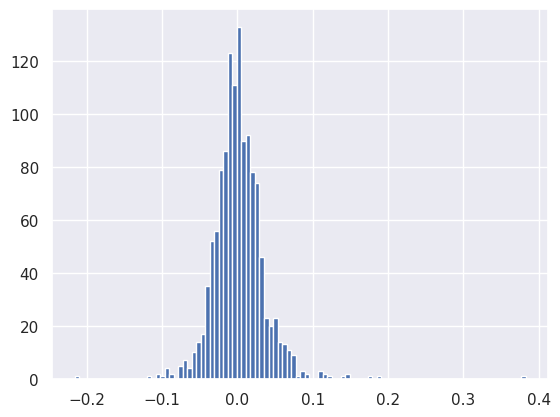

In [ ]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

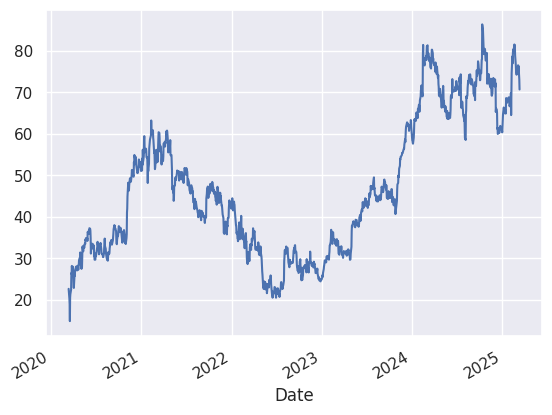

In [ ]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-13,24.01,24.81,21.13,22.60,53844417,23.305,NaN,NaN
2020-03-16,20.15,21.49,19.10,20.29,56913952,20.220,22.60,-0.102212
2020-03-17,20.18,20.31,18.01,18.91,60003887,19.545,20.29,-0.068014
2020-03-18,17.76,17.80,13.71,14.82,78286212,16.290,18.91,-0.216288
2020-03-19,15.96,21.26,15.70,20.49,83988721,18.225,14.82,0.382591


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-19,15.96,21.26,15.70,20.49,83988721,18.225,14.82,0.382591
2020-03-20,22.53,23.89,20.61,21.33,76529684,21.930,20.49,0.040996
2020-03-23,21.07,22.73,19.73,22.40,47787094,21.735,21.33,0.050164
2020-03-24,24.41,26.84,23.59,26.39,58505016,25.400,22.40,0.178125
2020-03-26,26.60,28.44,25.78,28.12,41370842,27.360,26.19,0.073692


In [ ]:
df_positive.Daily_Change.mean()

0.024988187442350145

In [ ]:
 df_negative = df[df.Daily_Change < 0]
 df_negative.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-16,20.15,21.49,19.1000,20.29,56913952,20.220,22.60,-0.102212
2020-03-17,20.18,20.31,18.0100,18.91,60003887,19.545,20.29,-0.068014
2020-03-18,17.76,17.80,13.7100,14.82,78286212,16.290,18.91,-0.216288
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39,-0.007579
2020-03-27,25.82,28.03,25.0700,27.28,40292212,26.550,28.12,-0.029872


In [ ]:
 df_negative.Daily_Change.mean()

-0.021858994010491586

In [ ]:
df.Close == df.High # maska logiczna

,0
Date,
2020-03-13,False
2020-03-16,False
2020-03-17,False
2020-03-18,False
2020-03-19,False
...,...
2025-03-05,False
2025-03-06,False
2025-03-07,False


In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [ ]:
df.index > '2025-03-01'

array([False, False, False, ...,  True,  True,  True])

In [ ]:
df[df.index > '2025-03-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-03-03,77.190,77.7400,73.6800,74.44,16999495,75.8150,76.01,-0.020655
2025-03-04,72.930,76.6800,71.6000,75.26,24241234,74.0950,74.44,0.011016
2025-03-05,75.650,76.9400,74.9300,76.48,13122294,76.0650,75.26,0.016210
2025-03-06,75.315,77.2200,74.7254,74.96,16504911,75.1375,76.48,-0.019874
2025-03-07,74.045,76.6996,73.7800,76.27,18610386,75.1575,74.96,0.017476
2025-03-10,74.780,75.4900,71.9700,73.06,22120094,73.9200,76.27,-0.042087
2025-03-11,71.440,74.2500,69.5700,70.65,26668190,71.0450,73.06,-0.032987


In [ ]:
df[(df.index >= '2025-02-27') & (df.index < '2025-03-05')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-02-27,76.00,77.69,73.71,74.21,22535938,75.105,75.87,-0.021880
2025-02-28,74.33,76.11,73.58,76.01,17752015,75.170,74.21,0.024255
2025-03-03,77.19,77.74,73.68,74.44,16999495,75.815,76.01,-0.020655
2025-03-04,72.93,76.68,71.60,75.26,24241234,74.095,74.44,0.011016


In [ ]:
df[(df.index == '2025-02-27') | (df.index == '2025-03-11')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-02-27,76.00,77.69,73.71,74.21,22535938,75.105,75.87,-0.021880
2025-03-11,71.44,74.25,69.57,70.65,26668190,71.045,73.06,-0.032987


In [ ]:
df[df.index.month == 5].head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
2020-10-01,36.860,37.8282,36.5800,37.14,19187502,37.0000,36.48,0.018092
2020-12-01,50.000,51.4100,49.0700,49.63,20619101,49.8150,49.66,-0.000604
2021-02-01,52.120,52.9000,51.3500,52.76,15570904,52.4400,50.93,0.035932
2021-03-01,53.670,54.7600,53.3000,54.40,18481137,54.0350,51.75,0.051208
